In [1]:
from src.data.genSynthData import genSynthDataS1, genNoisySynthDataS1, genSynthDataS2, genNoisySynthDataS2

In [2]:
# Importations 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as snb
import torch        
import random
# style stuff
snb.set(font_scale=1.5)
snb.set_style('darkgrid')
colors = ['r', 'g', 'b', 'y']

(array([ 2.,  3.,  3., 12., 13., 18., 22., 14.,  9.,  4.]),
 array([0.67091754, 0.91912084, 1.16732414, 1.41552744, 1.66373074,
        1.91193404, 2.16013734, 2.40834064, 2.65654394, 2.90474724,
        3.15295054]),
 <BarContainer object of 10 artists>)

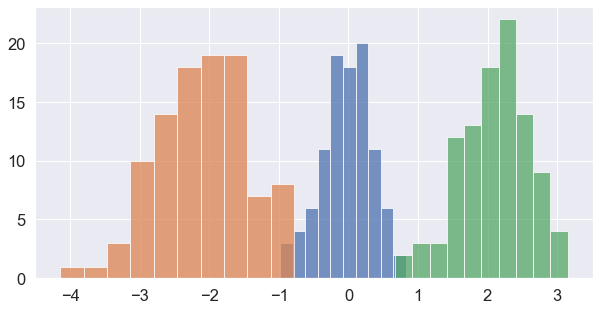

In [3]:
# Generate Spherical Data on S1 

# Draw theta from three gaussians
gr1 = np.random.normal(scale = 0.4, size = 100)
gr2 = np.random.normal(scale = 0.6, loc = -np.pi/1.5, size = 100)
gr3 = np.random.normal(scale= 0.5, loc = np.pi/1.5, size = 100)

plt.figure(figsize = (10,5))
plt.hist(gr1, alpha = 0.75)
plt.hist(gr2, alpha = 0.75)
plt.hist(gr3, alpha = 0.75)

(-1.1, 1.1)

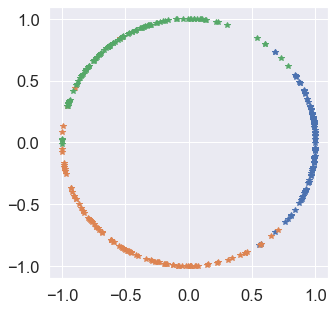

In [4]:
plt.figure(figsize = (5,5))
plt.plot(np.cos(gr1), np.sin(gr1), '*')
plt.plot(np.cos(gr2), np.sin(gr2), '*')
plt.plot(np.cos(gr3), np.sin(gr3), '*')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

In [5]:
# Seeting seed for reproducability
np.random.seed(60220)
Nclasses = 4
Nsamples = 500
np.random.seed(60220)

#Drawing means between -pi and pi
means = np.random.uniform(low = -np.pi, high = np.pi, size = Nclasses)
scales = np.random.uniform(low = 0.1, high = 1, size = Nclasses)

# Drawing angles from normal distribution 
thetas = [np.random.normal(loc = means[i], scale = scales[i], size = Nsamples) for i in range(Nclasses)]



(-1.1, 1.1)

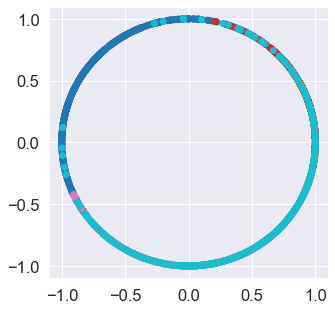

In [6]:
# Changing to polar coordinates 
samplesCartesian = [np.transpose(np.array([np.cos(thetas[i]), np.sin(thetas[i]),  np.ones(len(thetas[0]))*i])) for i in range(Nclasses)] # Size: samples, 2, Nclasses)
#np.transpose(np.array(samplesCartesian[1]))
samplesCartesian = np.concatenate(samplesCartesian)

coords = samplesCartesian[:,0:2]
target = samplesCartesian[:,2]

plt.figure(figsize = (5,5))
plt.scatter(x = samplesCartesian[:,0], y = samplesCartesian[:,1], c = samplesCartesian[:,2], cmap = "tab10")
plt.xlim((-1.1,1.1))
plt.ylim((-1.1,1.1))

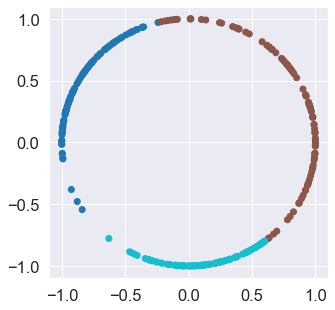

In [7]:
coords, target = genSynthDataS1(Nclasses = 3, Nsamples = 100, plotCartesian = True)

In [8]:
def genNoisySynthDataS1(Nsamples = 100, Nclasses = 3, plotCartesian = True, newDim= 20):
    # Getting synhetic S1 data 
    coords, target = genSynthDataS1(Nsamples, Nclasses, plotCartesian)

    # Multiplicative and additive random noise 
    noisyCoords = coords@np.random.normal(size = (np.shape(coords)[1],newDim)) + np.random.normal(size = (np.shape(coords)[0],newDim))

    return (noisyCoords, target)

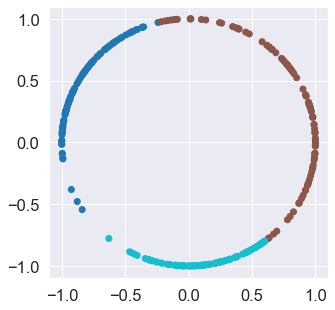

In [9]:
noisyDat, targets = genNoisySynthDataS1(newDim = 50)

In [10]:
#Generating on S2

import numpy as np  
import matplotlib.pyplot as plt
import seaborn as snb
import torch
import random

# Seeting seed for reproducability
np.random.seed(60220)

#Drawing means and sd for theta (inclination) between 0 and pi 
means_theta = np.random.uniform(low = 0, high = np.pi, size = Nclasses)
scales_theta = np.random.uniform(low = 0.1, high = 1, size = Nclasses)

#Drawing means and sd for phi (azimuth) between -pi and pi
means_phi = np.random.uniform(low = 0, high = 2*np.pi, size = Nclasses)
scales_phi = np.random.uniform(low = 0.1, high = 1, size = Nclasses)

# Drawing angles from normal distribution 
thetas = [np.random.normal(loc = means_theta[i], scale = scales_theta[i], size = Nsamples) for i in range(Nclasses)]
phis = [np.random.normal(loc = means_phi[i], scale = scales_phi[i], size = Nsamples) for i in range(Nclasses)]




In [11]:
xcoor = lambda theta, phi: np.sin(theta)*np.cos(phi)
ycoor = lambda theta, phi: np.sin(theta)*np.sin(phi)
zcoor = lambda theta: np.cos(theta)


In [12]:
# Changing to polar coordinates 
samplesCartesian = [np.transpose(np.array([xcoor(thetas[i], phis[i]), ycoor(thetas[i], phis[i]), zcoor(thetas[i]), np.ones(len(thetas[i]))*i])) for i in range(Nclasses)] # Size: samples, [x,y,z,t], Nclasses)
samplesCartesian = np.concatenate(samplesCartesian)


In [13]:
coords = samplesCartesian[:,0:3]
target = samplesCartesian[:,3]


coords, target = genSynthDataS1(Nclasses = 3, Nsamples = 100, plotCartesian = False)

import plotly.express as px
from plotly import graph_objects as go

fig = go.Figure()
fig.add_trace((go.Scatter3d(
    x=samplesCartesian[:,0], 
    y= samplesCartesian[:,1], 
    z= samplesCartesian[:,2], #np.zeros(np.shape(coords)[0]),
    mode="markers",
    marker = dict(color = samplesCartesian[:,3], 
                  size = 4)
)))

fig.update_layout(scene_aspectmode='manual',
                  scene_aspectratio=dict(x=1, y=1, z=1),
                  scene_xaxis=dict(range = (-1, 1)),
                  scene_yaxis=dict(range = (-1, 1)),
                  scene_zaxis=dict(range = (-1, 1)))
fig


In [16]:
tmp1, tmp2 = genSynthDataS2(Nclasses = 3, Nsamples = 500)
tmp1, tmp2 = genNoisySynthDataS2(Nclasses = 3, Nsamples = 500)


(1500, 50)